# Exploratory Task 3


In this task, we are initially checking for missing/null values in the US-All datasets and the X dataset. 

There is a date format difference between US-All datasets and our X (Homelessness) dataset. 
Our X dataset had the format mm/dd/yyyy whereas the US-All dataset has yyyy-mm-dd. We have converted X dataset format to yyyy-mm-dd.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
us_confirmed = pd.read_csv("US-all/US_confirmed.csv")
us_deaths = pd.read_csv("US-all/US_deaths.csv")
homeless = pd.read_csv("US-all/DHS_Daily_Report.csv")

In [3]:
print(us_confirmed.isnull().values.any())
print(us_deaths.isnull().values.any())
print(homeless.isnull().values.any())

False
False
False


In [4]:
homeless['Date of Census'] = pd.to_datetime(homeless['Date of Census'])

In [5]:
homeless.sort_values(by=['Date of Census'], inplace=True, ascending=False)

In [6]:
homeless.head()

,Date of Census,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
2792,2021-05-10,33430,15504,48934,13565,4361,17926,8920,11728,15504,27232,1795,3776
2791,2021-05-09,33565,15619,49184,13614,4346,17960,8981,11814,15619,27433,1802,3791
2790,2021-05-08,33466,15630,49096,13479,4360,17839,8994,11833,15630,27463,1804,3794
2789,2021-05-07,33511,15606,49117,13490,4377,17867,8999,11844,15606,27450,1807,3800
2788,2021-05-06,33560,15587,49147,13551,4389,17940,8985,11828,15587,27415,1803,3792


In [7]:
def plotGraph(date,data):
    plt.plot(date,data,label="Total Homeless")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper left')
    plt.xticks(rotation=30)
    plt.show()

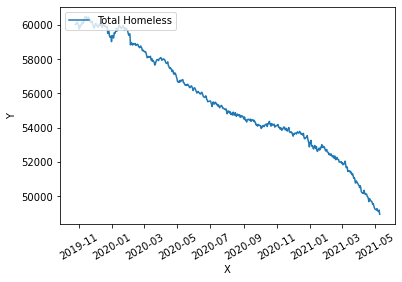

In [8]:
date = homeless['Date of Census'][:600]
individualsInShelter = homeless['Total Individuals in Shelter'][:600]
plotGraph(date,individualsInShelter)

In [9]:
homeless_after_vaccine = homeless[((homeless['Date of Census'].dt.strftime('%Y-%m-%d') >= '2020-12-14'))][-60:]
homeless_before_vaccine = homeless[(homeless['Date of Census'].dt.strftime('%Y-%m-%d') <= '2020-12-14')][:60]

In [10]:
us_deaths_transposed = us_deaths.T
new_header = us_deaths_transposed.iloc[0] #grab the first row for the header
us_deaths_transposed= us_deaths_transposed[1:] #take the data less the header row
us_deaths_transposed.columns = new_header #set the header row as the df header
us_deaths_transposed['total_death'] = us_deaths_transposed.sum(axis =1)

In [11]:
date = us_deaths_transposed.index
us_deaths_transposed['date'] = date

In [12]:
us_deaths_transposed = us_deaths_transposed.set_index('date').diff()

In [13]:
us_deaths_transposed = us_deaths_transposed.reset_index()

In [14]:
us_deaths_after_vaccine = us_deaths_transposed[((us_deaths_transposed['date'] >= '2020-12-14'))][:60]
us_deaths_before_vaccine = us_deaths_transposed[((us_deaths_transposed['date'] <= '2020-12-14'))][-60:]

In [15]:
us_confirmed_transposed = us_confirmed.T
new_header = us_confirmed_transposed.iloc[0] #grab the first row for the header
us_confirmed_transposed= us_confirmed_transposed[1:] #take the data less the header row
us_confirmed_transposed.columns = new_header #set the header row as the df header
us_confirmed_transposed['total_confirmed'] = us_confirmed_transposed.sum(axis =1)

In [16]:
date = us_confirmed_transposed.index
us_confirmed_transposed['date'] = date

In [17]:
us_confirmed_transposed = us_confirmed_transposed.set_index('date').diff()

In [18]:
us_confirmed_transposed = us_confirmed_transposed.reset_index()

In [19]:
us_confirmed_after_vaccine = us_confirmed_transposed[((us_confirmed_transposed['date'] >= '2020-12-14'))][:60]
us_confirmed_before_vaccine = us_confirmed_transposed[((us_confirmed_transposed['date'] <= '2020-12-14'))][-60:]

In [30]:
matrix_vaccine = np.zeros([2,4],int)
matrix_vaccine[0][0] = homeless_before_vaccine['Single Adult Men in Shelter'].sum()
matrix_vaccine[0][1] = homeless_after_vaccine['Single Adult Men in Shelter'].sum()
matrix_vaccine[0][2] = homeless_before_vaccine['Single Adult Women in Shelter'].sum()
matrix_vaccine[0][3] = homeless_after_vaccine['Single Adult Women in Shelter'].sum()
matrix_vaccine[1][0] = us_confirmed_before_vaccine['total_confirmed'].sum()
matrix_vaccine[1][1] = us_confirmed_after_vaccine['total_confirmed'].sum()
matrix_vaccine[1][2] = us_deaths_before_vaccine['total_death'].sum()
matrix_vaccine[1][3] = us_deaths_after_vaccine['total_death'].sum()

rows = 2
cols = 4

df = (rows-1)*(cols-1)

total_row1,total_row2= np.sum(matrix_vaccine,axis=1)
total_col1,total_col2,total_col3,total_col4  = np.sum(matrix_vaccine,axis=0)


total = total_row1+total_row2 

expected_values = np.zeros([2,4])
expected_values[0][0] = (float(total_col1)*total_row1)/(total)
expected_values[0][1] = (float(total_col2)*total_row1)/(total)
expected_values[1][0] = (float(total_col1)*total_row2)/(total)
expected_values[1][1] = (float(total_col2)*total_row2)/(total)
expected_values[0][2] = (float(total_col3)*total_row1)/(total)
expected_values[1][2] = (float(total_col4)*total_row1)/(total)
expected_values[0][3] = (float(total_col3)*total_row2)/(total)
expected_values[1][3] = (float(total_col4)*total_row2)/(total)

q_expected = 0.0
for i in range(rows):
    for j in range(cols):
        q_expected = q_expected + ((expected_values[i][j] - matrix_vaccine[i][j])**2)/float(expected_values[i][j])

print(q_expected,df)

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
1860524.0039301675 3


We are taking alpha = 0.05
Since Q statistic is really large, from the table we find out that the p-value will be really small.
p-value <<< alpha

Hence, X = Men/Women in Shelters is dependent on Y = US all cases/deaths.
